NOTE: CoLab usually autosaves your work, but just to be safe, make sure to save it manually too!


***Double click*** and enter your name here!

Name:

*This week you'll be completing two mini-labs, Lab 2 and Lab 2.5, which are both included in this Python notebook.*

# Lab 2: One-Dimensional Cellular Automata
For your first mini-lab, we'll be looking at 1D cellular automata. As part of this lab, you'll be programming your first ever complex systems model! It's a simple one, but we need time to work up to stuff like forest fires and disease spread.

There are 3 basic coding exercises, the content of which will come in handy when you complete Problem 4, which is very in-depth.

As always, we implore you to **come in or email one of us if you need help**. We expect you to have questions (that's the point!), and we don't want you to struggle all by yourself.

# Basic coding exercises
## Problem 1: Using Modulus (```%```) (1 point)
In the code block below, use a ```for``` loop that runs 100 times to print the numbers 0-9 ten times each in order. Your answer must use the ```%``` operator. This operator is called modulus, and it takes the remainder of dividing the first number by the second number.

For example, ```50 % 7``` = 1 because 50/7 = 7 with a remainder of 1.

In [ ]:
for i in range(100):
  print(i) # <-- You need to modify this line

## Problem 2: 2D Arrays (2 points)
You can think of a 2D array sort of like a table or a spreadsheet, with a certain number of rows and columns. In this problem, we'll get used to how they work so that we can use them to make cellular automata.

You can find basic instructions on how to initialize a 2D array in the codeblock below. Go ahead and read through the code to make sure you understand it, then run the code and see what happens.

In [ ]:
# To easily make a 2D array, we can use numpy
import numpy as np

# Using numpy, this command makes a 2D array of all zeros, with 3 rows and 8 columns
TwoD_array = np.zeros([3,8])
# Print it so you know I'm not lying
print("2D Array of Zeros:\n", TwoD_array)

"Cool," you say, "but a table full of zeros seems pretty useless to me." Right you are, bud! Let's learn how to fill the array with data.

We have 3 lists that we want to input into the ***rows*** of the 2D array above. Naturally, each of these lists is 8 units long.

In [ ]:
# First run the code block above, or this one won't work

# Next, we'll make a copy of our 2D array
TwoD_array1 = TwoD_array.copy()

# The way to change one element in a 2D array in python is to use its location based on its row and column.
# For example, TwoD_array[0, 2] = 5 changes the value in row 0, column 2 to 5
TwoD_array1[0, 2] = 5
print("Updated 2D Array:\n", TwoD_array1) # Print it so you believe me. The '\n' bit just makes a new line

TwoD_array2 = TwoD_array1.copy()

# But how to change an entire row at once? Instead of specifying a column, you can use a colon (:)!
# Ex. TwoD_array2[0, :] = list changes all of row 0 to the elements of the list!
list_row_0 = [0, 1, 2, 3, 4, 5, 6, 7]
list_row_1 = [8, 9, 10, 11, 12, 13, 14, 15]
list_row_2 = [16, 17, 18, 19, 20, 21, 22, 23]

print("\n Fully-filled 2D array:") # Here's a label for you.
# <-- Your code goes here

**2.A** (2 points) In the codeblock above, fill ```TwoD_array2``` using the three provided lists. Then, print the 2D array after you've updated it with your data.

## Problem 3: Addictionary (1 point)

>>A man asked his friend," what do you call a dictionary on drugs? "

>>His friend replied," If it is addictionary I swear to God I am going to kill you."

>>The man replied," I was going to say ' high definition ' but yours is better.

The data structure below is called a dictionary, denoted by curly brackets ```{}```. It's a special type of list where you can specify inputs and outputs. It works by placing a colon in-between our input and our desired output, like so:

```dodge_modeltype_dictionary = {"Durango":"SUV", "Challenger":"Coupe", "Grand Caravan":"Minivan", "Dart":"Sedan", "Dakota":"Pickup Truck"}```

>If we ```print(dodge_modeltype_dictionary["Durango"])```, we will get ```SUV``` as an output.

**3.A** (1 point) In the codeblock below, make your own dictionary and pull a value from it using a print statement like the one above.

In [ ]:
# <-- Your code here

## Problem 4: One-Dimensional Democracy (9 points)
It's time to make your first political model! We're going to start out very simple, with a 1D grid of people. These people can either vote for candidate 0 or candidate 1.

First, let's take a look at what this looks like when we visualize this in Matplotlib. Carefully read the code block below to ensure that you understand it, then run it and see what happens!

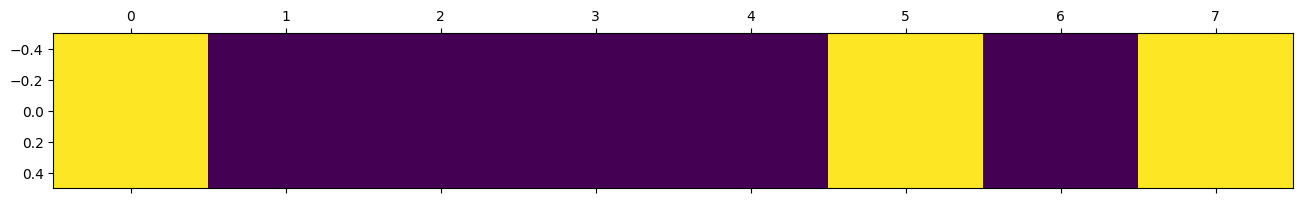

In [ ]:
# Each spot in the list voter_preferences represents the preference of a voter.
# In this model, we have 8 voters total, and they can be referred to by their list index (0,1,2,3,4,5,6, or 7)
# In the list below, for example, voter #0 wants candidate 1, voter #1 wants candidate 0, voter #2 wants candidate 0, and so on.

voter_preferences = [1, 0, 0, 0, 0, 1, 0, 1]

## We can use Matplotlib to visualize the voter preferences in a nice picture:
# First we need to import Matplotlib so that we can use it:
import matplotlib.pyplot as plt # Now we can refer to it using "plt"

# This makes our list into a picture, where a preference for candidate 0 is one color (purple) and a preference for candidate 1 is a different one (yellow)
plt.matshow([voter_preferences])

**4.A** (1 point) Make sure to run the above code-block. Then, make your own list of voter preferences in the block below and create a visualization.

In [ ]:
voter_preferences2 = [[None, None, None, None, None, None, None, None]] # <-- Change 'None' to make your own list of voter preferences here
# NOTE: you have to use double brackets [[]] because Matplotlib gets angry otherwise

# <-- Make a visualization of your voter preferences here using plt.matshow()

Now that we have a good way to visualize our voters and their preferences, let's examine a simple theory of how voters change their minds.

### Rules
In this world, we're going to imagine that voters do the following:
1.   Form their preference entirely based on the majority opinion of the two voters that directly neighbor them, not taking into account their own current preference
2.   If the two neighboring voters disagree, that means there is no local majority (a tie). In this case, the voter just chooses candidate 1 as a tie-breaker
3.   The voters keep repeating this process over and over again for 20 steps

Now we're ready to write up these rules in code format!

**4.B** (1 point) In the below dictionary, we input 3 votes in the following format: ```(left neighbor's vote, our vote, right neighbor's vote)```

Then, the dictionary tells us what our vote (as the middle voter) will become based on the above rules (detailed under the **Rules** heading).

>For example, ```voter_rules[(1, 0, 1)]``` should output ```1```, because the middle voter sees that the majority of his neighbors prefer candidate 1

Based on the rules detailed under **Rules**, fill out the rest of the dictionary below, were you see a ```<--```.

In [ ]:
voter_rules = {
        (0,0,0):0, # Pretend we are the middle 0 in the list (0,0,0). If we vote 0 and our neighbors both vote 0, majority is 0 and we stay 0 for the next time-step
        (0,0,1):1,
        (0,1,0):0,
        (0,1,1):, # <--
        (1,0,0):, # <--
        (1,0,1):1,
        (1,1,0):, # <--
        (1,1,1): # <--
        }

# NOTE: You need to run this code block for the subsequent ones to work

Now we need to write some code that looks at the current state of our world, and updates it based on the rules we just made.

>NOTE: As discussed in class, we want the world to wrap around, sort of like Pac Man. In other words, imagine that all of the voters are standing in a circle. This means that voter 7's neighbors are voter 6 and voter 0, and that voter 0's neighbors are voter 7 and voter 1. We can use the modulus ```%``` command to achieve this, because  ```8 % 8``` becomes 0, and ```-1 % 8``` becomes 7.

**4.C** (2 points) The codeblock below contains our update function. When we call the function by using ```update(preference_list)```, it uses the rules above to update our list of candidate preferences.

If we have a list of preferences called ```voter_preferences```, we can update them by using ```voter_preferences = update(voter_preferences)```

Your job is to fill in the blanks of this update function. Specifically, as we loop though the 8 voters, we need to pull the preferences of the current_voter and both neighbors.

Then, we need to feed these preferences into the dictionary that we made above. Doing this will ensure that the current_voter changes his preference based on the rules we setup!.

Edit where you see a ```<--```

In [ ]:
# Here is the update function. It should take the current voter preferences as an argument, and return the next voter preferences based on our rules.
# Note that it doesn't do anything until we call it using update(list)
def update(current_voter_preferences):
    # Make a new list, next_voter_preferences, that's 8 units long
    next_voter_preferences = [0]*8 # We start out by making a list of 8 zeros as placeholders

    # Loop through all 8 voters
    for current_voter in range(8):
      # For the current voter, who are my neighbors? Remember that you need to use modulus (%) to wrap the world!
      left_neighbor_preference = current_voter_preferences[(current_voter - 1) % 8]
      current_voter_preference = # <--
      right_neighbor_preference = # <--

      # Enter the state of current_voter and its neighbors into the dictionary voter_rules to recieve the next state of current_voter
      next_voter_preferences[current_voter] = voter_rules[(None,None,None)] # <-- We need to pass the three voter preferences to our dictionary

    return next_voter_preferences # Done, now we send back the updated preferences using 'return'

Run the codeblock above to check for errors. Again, it shouldn't do anything yet because we didn't call the function using ```update(list)```.

Now, we have our set of rules, our visualization method, and our update function, it's time to put it all together.

**4.D** (2 points) The code below runs the model for us. We're going to update the voter preferences 20 times and visualize using a 2D array.

We'll assign lists to the rows of the 2D array just like we did in Problem 2 above, except this time, each of the lists represents one voter preference update.

In modeling speak, each of the rows will represent our world at a certain timestep. It'll be like placing a bunch of the visualizations from part *4.A* on top of eachother to see how the voter preferences change over time.

First, you need to complete the codeblock below, edit where you see ```<--```

In [ ]:
# Import numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# We run the model for 20 steps
total_time_steps = 20

# Set our initial voter preferences:
initial_voter_preferences = [1, 0, 0, 0, 0, 0, 0, 1]

# Make a list of 20 lists, each of these lists will be filled in with an iteration of our world (with 8 voters)
# Considering that a column represents a voter, and a row represents a time_step, how many rows and columns do we need?
voter_model = np.zeros([None,None]) # <-- Initialize a 2D array using np.zeros([rows, columns])

# Place our initial voter preferences in the first row
voter_model[0,:] = # <-- Assign initial_voter_preferences to row 0 of the 2D array

# The rest of the rows in our 2D array represent timesteps
# We calculate the next timstep by updating the current time-step (using update()), then place the next timestep in a new row of our array
for i in range(1,total_time_steps):
    voter_model[i,:] = update(voter_model[i-1,:]) # Here is where we use our update function to assign the rest of the rows!

plt.matshow(None) # <-- Visualize the 2D array

**4.E** (1 point) When the initial voter preference was ```[1, 0, 0, 0, 0, 0, 0, 1]```, who ended up winning (candidate 0 or 1?)

***Double click*** and write down your response here!

**4.F** (2 points) Try running the voter model again, except this time your initial condition is ```[1, 0, 0, 0, 0, 0, 0, 0]```. Did any candidate win this time? How does changing the initial preference of one agent affect the model? Is this surprising?

***Double click*** and write down your response here!

# Lab 2.5: 2D Cellular Automata
>"A mind that is stretched by a new experience can never go back to its old dimensions."

>— Oliver Wendell Holmes, Jr. (Supreme Court Justice)

Get ready to enter an alternate dimension! Because there's a lot of new coding stuff that we need to move into a two-dimensional world, this lab (for the sake of brevity) won't include many of the awesome 2D cellular automata that we've discussed in class.

Rest assured that slight tweaks to the code that you learn here will result in working models of forest fires, disease spread, game of life, eising, and more! You'll see some of this on the next lab.

This one only has 3 problems, but they are long. Problem 1 is a basic coding exercise that will help you with Problem 2. Problem 3 is fully conceptual, and as such it requires no programming.

Insert hackneyed advice about coming to office hours here.

## Basic Coding Exercises
### Problem 1: 2D, Harray! 2D, Harray! (7 points)
In this problem, your job will be to use ```np.random.choice([list], (rows, columns))``` to create a 2D array of numbers that take either the value 0 or the value 1.

To do this, you'll need to pass a list to the function that contains the numbers you want it to randomly choose from when creating the array. Because we want binary values (0 and 1) only, your list will be of length 2.

**1.A** (1 point) Using the function mentioned above, create and print a 4 × 6 array of randomly-generated binary values. Make sure to assign it to a variable. Call the variable whatever you want (barring profanity): most creative name gets a shout-out at the beginning of class!

In [ ]:
# First we need to import the packages that we need
import random
import numpy as np

# <-- Your code goes here

Channeling my sneaky, beguiling ways, I've just had you unknowingly create a randomly-generated initial condition for a 2D cellular automata! Neat!

**1.B** (1 point) In the codeblock below, use ```plt.matshow(array)``` to visualize the initial condition you made.

In [ ]:
# We need matplotlib
import matplotlib.pyplot as plt

# <-- Your code goes here

**1.C** (2 points) Your next job is to figure out how many cells in your array are "on." In binary, a cell is "on" if it has value 1, and "off" if it has value 0.

One method of doing this is to count the number of yellow squares by hand, but if we have a big array that's going to get old pretty quick. To avoid having to do work, we'll make the computer do it algorithmically.

>HINT 1: To accomplish our goal, you need a nested set of ```for``` loops: one ```for``` loop to go through each row, and another ```for``` loop inside of the first one that goes through every column in that row. More on this can be found in Lecture 4, Slide 34.

>HINT 2: Because cells that are "off" have value 0, the sum of the values in all cells will equal the number of cells that are "on!" This is because 0 doesn't contribute to the sum.

In [ ]:
num_rows = None # <-- how many rows does your array have?
num_columns = None # <-- how many columns does your array have?
on_counter = 0 # We'll use on_counter to count the number of cells in the array that are "on"

# <-- Using the num_rows and num_columns variables, write code here that traverses the entire array,
# and uses on_counter to keep track of how many elements are "on".
# FOR THIS PROBLEM, DO NOT USE CONDITIONAL (if, else) STATEMENTS. See HINT 2 for a cleaner way.


# <-- Now print on_counter to get your result

By default, ```np.random.choice([0,1], (rows, columns))``` makes a 2D array in which each element is equally likely to be assigned 0 or 1. What if we wanted our initial condition to contain more zeros than ones?

It turns out that ```np.random.choice``` allows us to set a probability for each option that it chooses from! To do this, you can pass a list of probabilities ```p = [list]``` as another argument that corresponds to your list of choices (from the first argument).

Here's an example in which the function has a 60% chance of assigning a 0 and a 40% chance of assigning a 1:

```np.random.choice([0,1], (rows, columns), p = [.6,.4])```

**1.D** (1 point) In the codeblock below, create an initial condition that is more likely to contain ones than zeros. Then, use the method you practiced in part C to count the number of cells that are "on" in your new initial condition.

In [ ]:
# Let's re-import the packages so we don't have to run the above codeblocks again:
import random
import numpy as np

# <-- Your code goes here

Recall that in the 1D cellular automata that we examined last week, the current state of a cell and its neighbors is what we used to determine the next state of that cell.  A 2D cellular automata works in exactly the same way, with the only difference being that we have more neighbors to worry about in 2D!

In Lecture 4, Slide 23, we learned that there are two commonly-used neighborhood definitions: the neighborhood consisting of the surrounding 8 squares (Moore neighborhood), and the North/South/West/East neighborhood consisting of 4 squares (von Neumann neighborhood).

**1.E** (2 points) In this problem, we're going to walk through how to check the Moore neighborhood of a cell to see how many squares in the neighborhood are "on." Fill in your own code where you see a  ```<--```. In this problem, we'll check the neighborhood of cell ```[1,3]```.

In [ ]:
# Let's re-import the packages so we don't have to run the above codeblocks again:
import random
import numpy as np
import matplotlib.pyplot as plt

# <-- Fill in the number of rows and columns your 4 × 6 cellular automata has
total_rows = None
total_columns = None

initial_state = np.random.choice([0,1], (total_rows, total_columns)) # Create an initial state, same as in part A
plt.matshow(None) # <-- Visualize your initial state

on_counter = 0

# <-- Fill in row and column of the cell we want to check ([1,3])
current_row = None
current_column = None

# Like in part C, we need nested loops that traverse the array. The difference is that this time, we're only interested in a sub-section (or neighborhood) within
# the array.
# This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
for neigh_row in None: # <-- Remember that there are two ways to do this. You can either pass a list of three row indexes^^, or generate a list with range()

  # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
  # and current_column + 1 (right 1 column)
  for neigh_column in None: # <--

    # This code sums up all of the assigned values in the neighborhood we're checking (see 1.C, HINT 2)
    on_counter += initial_state[neigh_row % total_rows, neigh_column % total_columns] # IMPORTANT: like in Lab 2, we need to use modulus (%) to wrap the rows and columns!

print(on_counter, "cells in the Moore neighborhood of [1,3] are on") # Print your result

## 2D Cellular Automata
### Problem 2: Two-Dimensional Democracy
It's time to make your second political model. This one is really similar to last week's, but now our voters are positioned in a grid instead of a line.

If you've mastered the techniques from Lab 2: Problem 4 and Lab 2.5: Problem 1, coding this model should feel quite natural.

**2.A** (1 point) First, use the codeblock below to create and visualize an initial condition. We're going to make a much bigger grid this time, with 100 rows and 100 columns. That means that our model will contain 100 × 100 = 1000 voters!

Your initial condition should show a grid of 1000 voters that have a preference for either candidate 0 or candidate 1, assigned randomly. For now, stick with equal likelihood of assigning a 0 or a 1 preference to each voter.

In [ ]:
# Import the packages that we need
import random
import numpy as np
import matplotlib.pyplot as plt

total_rows = None # <--
total_columns = None # <--

initial_voter_preferences = None # <-- Create your initial condition here using total_rows and total_columns

plt.matshow(None) # <-- visualize your initial condition here

The general rules behind this 2D voter model are a little different from the 1D version:


*   We use a Moore neighborhood in this model
*   Voters still form their preferences entirely based on the majority opinion of neighbor voters, not taking into account their own current preference
*   If there is no majority opinion among neighbors (a 4/4 split), voters don't change their vote

In order to codify rules for updating preferences in the 1D model, it was convienient to use a dictionary ```voter_rules``` as a function that recieved a current set of preferences and returned what the next preference should be.

If we used a dictionary here, we would need to pass 9 different numbers to it instead of 3, and then create a rule for each possible combination! That sounds terrible, but not to worry! There's a better way.

In the 2D model, we still need a ```voter_rules``` function, but instead of a dictionary, it will be easier to write it up using conditional statements. We will walk through how to do this in the codeblock below.

**2.B** (1 point) Based on the rules bulleted above, make the 2D version of the ```voter_rules``` function. I've already written the rule for when the current voter prefers candidate 0. You will fill in the logic that occurs if voter currently prefers candidate 1. Fill in your code where you see ```<--```.
>HINT: From Problem *1.C.*, recall that the sum of all cells in a neighborhood is equal to the number that are "on."  In this model, a cell being "on" means a voter who prefers candidate 1. Therefore, the sum total of votes in a neighborhood is equal to the number of votes for candidate 1.

In [ ]:
# Here is our 2D voter_rules(). We tell it the sum total of votes in a neighborhood, and also the preference of the current voter
# The function returns what the next preference of our voter should be based on the rules.
def voter_rules2D(neighborhood_vote_total, current_voter_preference):

  next_voter_preference = None # DON'T CHANGE! We initialize next_voter_preference to be nothing (on purpose this time because our code will change it for us)

  # Here's the logic if the current voter wants candidate 0.
  if current_voter_preference == 0:
    if neighborhood_vote_total > 4: # If majority want candidate 1, switch preference to 1
      next_voter_preference = 1
    else: # Otherwise, keep it at 0
      next_voter_preference = 0

  else: # else if current_voter_preference == 1
    # We need to subtract 1 because we don't want the current voter's vote considered
    adjust_neighborhood_vote_total = neighborhood_vote_total - 1
    # If majority want candidate 0, switch the vote
    if (8 - adjust_neighborhood_vote_total) > 4: # (8 - neighborhood_vote_total) = the number of votes for candidate 0!
      next_voter_preference = None # <--
    else: # Otherwise, keep the vote the same
      next_voter_preference = None # <--

  return next_voter_preference # We send back the next_voter_preference based on the rules!

Now that you've written up the logic for how we can update voter preferences, we need to actually go through and check every voter's neighborhood so we can update every voter's preference. We can use techniques that we learned in Problem 1 to accomplish this. Your code will have to do the following:


1.   Iterate through every voter in the grid (Like *Problem 1.C*)
2.   Check the votes in the neighborhood of every voter (Like *Problem 1.E*)
3.   Update the vote of the current voter (using ```voter_rules```)
4.   Display the voter preferences in a new visualization in every timestep (like the animation problem in Lab 1).

We already took care of #3, so now let's continue to go out of order and take care of #2. The reason why we're going backwards will become clear shortly.

We're going to make another function to accomplish #2. This function will take 5 inputs (```current_row```, ```current_column```, ```total_rows```, ```total_columns```, and ```current_votes_grid```) and return the number of votes for candidate 1 in the neighborhood of the voter who is located at ```current_row```, ```current_column```.

**2.C** (2 points) I've helpfully pasted in some of the code from *Problem 1.E*, but it's incomplete. Can you fix it? Yes you can! Look for ```<--```.

In [ ]:
# We use this function to get neighborhood_vote_total. Recall that this is equal to the number of votes for candidate 1 in the current timestep.

def count_neighborhood_votes(current_row, current_column, total_rows, total_columns, current_votes_grid):

  neighborhood_vote_total = 0 # Initialize this variable to count the neighborhood vote total

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in None: # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in None: # <--

      # This code sums up all of the votes in the neighborhood we're checking
      neighborhood_vote_total += current_votes_grid[None % total_rows, None % total_columns] # <--

  # We return the neighborhood_vote_total
  return neighborhood_vote_total


By making the ```voter_rules()``` and ```count_neighborhood_votes()``` functions, we've already done most of the heavy-lifting in designing our 2D voter model. Now all we have to do is #1 and #4 from the checklist above! Similar to in the 1D voter model, we'll call the function that does #1 ```update()```. Our update function will take four arguments.

**2.D** (1 points) Fix the update function. As always, look for ```<--```.

In [ ]:
def update2D(current_votes_grid, next_votes_grid, total_rows, total_columns):

  # Iterate through every row and column
  for current_row in range(total_rows):
    for current_column in range(total_columns):
      current_voter_preference = current_votes_grid[None, None] # <-- How to we pull the preference of the voter at the current location?

      neighborhood_vote_total = None # <-- What function do we call to count the neighborhood vote total?
      next_voter_preference = None # <-- What function refreshes the voter preference based on the rules?

      next_votes_grid[current_row, current_column] = next_voter_preference # Update the voter preference

  return next_votes_grid

Now, at long last, we are ready to run the model.

**2.E** (2 points) Complete the code below that you need in order to run and visualize the model! Look for ```<--```.
>HINT: Recall from Lab 1 that we clear the output using ```display.clear_output(wait=True)```, and that doing this helps us to create animations.

If the next codeblock doesn't run for you on the first try, no sweat! This is the hardest model we've coded up so far. Double check your code for parts A through D (and make sure that you already ran those parts so that the computer will be able to see them).

If you need help understanding error messages, come to office hours!

In [ ]:
# NOTE: Make sure to run the code in parts A, B, C, and D so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display
from pylab import *

current_votes_grid = initial_voter_preferences # Set our initial voter preferences from part A

# Now we make a temporary variable to store the next voter preferences while we're running update()
next_votes_grid = None # <-- Create a total_rows × total_columns array of zeros that we can use to store the next voter preferences (use np.zeros([]))

# Let's run the model for 6 timesteps to start
total_time_steps = 6

for current_timestep in range(total_time_steps):
  current_votes_grid = None # <-- What function do we use to update current voter grid?
  plt.close() # Close the last plot before making the new one
  plt.matshow(None) # <-- Visualize this timestep

  # —— The lines of code below run the animation! ——
   # <-- clear the output here, otherwise you will get a bunch of figures!
  display.display(gcf()) # This tells the computer to display the visualization as the code is running
  time.sleep(0.8) # changing this number changes the speed of the visual updates

plt.close() # Closes the final plot

**2.F** (2 points) Congragulations, you just made a 2D voter model! Now, answer the following questions:

*   What do you observe? Any voting patterns?
*   Is there a unanimous victory for a single candidate like in the 1D model?
*   Does this model oscillate or settle into a fixed state?

***Double click*** and write down your response here!

**2.G** (2 points) You are now intimately familar with the inner workings of two cellular-automata (CA) based voting models: 1D and 2D.

Using your newfound expertise on these two voting models, which one do you think is more applicable to the real world?

Based on your answer to the above question, respond to the following:


*   Name one aspect of real-world voting that your chosen CA-based voting model succeeds in capturing
*   Name three aspects of real-world voting that your chosen CA-based voting model fails to capture



***Double click*** and write down your response here!

Now it's time to play around with parameters! Yay! This is the fun part because you can just change some numbers in your code to see how they affect the output of your model.

**2.H** (1 point) Copy and paste the ```voter_rules()``` function from part B into the codeblock below. Rename it ```voter_rules1()```. Then, change your ```update()``` function from part D above to use ```voter_rules1```.

In [ ]:
# DON'T FORGET TO RUN THIS BLOCK AFTER YOU'RE FINISHED

# <-- Your code here

**2.I** (3 points) Now it's time to play! See what happens when you make your voters more "stubborn." That would entail editing ```voter_rules1``` so that,  in order to change their vote, voters require a larger number of peers to prefer the opposing candidate (a bigger majority).

Now, make your voters more "impressionable." Change ```voter_rules1``` so that, to change their vote, voters only need a certain minority of neighbors to have an opposite preference.

What happened? How does changing the stubbornness/impressionability of your voters affect the output of the model?
> HINT: In class, we discussed how changing parameters in 2D cellular automata can affect clump sizes. It would be wise to mention something along these lines in your answer.

>NOTE: As you change the rules, you may need to run the model for more than 6 timesteps to get a better idea of behavior.

>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*. (make sure it uses the original ```voter_rules``` function)

***Double click*** and write down your response here!

# Conceptual Question
## Problem 3: Freestyle (15 points)

Last question, I promise! Keep in mind that the thinking you do for conceptual problems can help you indentify a possible topic of interest for the final project.

**3.A** (7 points) Think of a process that could be modeled with either a 1D cellular automata or a 2D cellular automata (**strictest definition**^). Then,


*   Describe this process
*   Discuss why you think this process can be well represented with a cellular automata

>^The strictest definition of cellular automata can be found in Lecture 4, Slides 4 and 5. Make sure that the model you come up with falls under this definition. Specifically, keep in mind that **movement generally does not comply with the strictest definition**.

***Double click*** and write down your response here!

**3.B** (8 points)

* In plain English, write down the rules that your cellular automata would follow. What neighborhood definition does your model use? How do the agents update in each timestep?
*   Come up with some parameters in your model that you could change to conduct an experiment.
*   Do you expect your model to oscillate, settle to a fixed state, or would it depend on parameters?

***Double click*** and write down your response here!

You're done now, the pain is over. Now you can go back to day drinking and binge-watching your troubles away. Nice.